# 2.2 Learning by Self Practice

In [1]:
# Importing the necessary modules and instanciating the environment and the agent

import numpy as np
from tic_env_test import TictactoeEnv, OptimalPlayer, Agent
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

env = TictactoeEnv()
agent = Agent()

In [2]:
# Initialize the number of games and the turns

nb_games = 20000
Turns = np.array(['X','O'])

# Initialize table of Q_values
state_space = 19683
action_space = 9
Q = np.zeros([state_space, action_space])

# Initialize hyper-parameters
alpha = 0.05
gamma = 0.99

## Question 7

In [3]:
# Initialize epsilon values from 0 to 1 with 6 elements
epsilon_agent = np.linspace(0,1,6)

# Initialize lists for reward tracking
Mopt = np.zeros((len(epsilon_agent), int(nb_games/250)))
Mrand = np.zeros((len(epsilon_agent), int(nb_games/250)))

In [4]:
# Iterate over the values of epsilon and initialize the Q values
for eps in range(len(epsilon_agent)):
    print("... epsilon_agent =", epsilon_agent[eps])
    Q = np.zeros([state_space, action_space])
    p = 0

    # For each number of games
    for i in range(nb_games):
        env.reset()
        grid, _, __ = env.observe()
        # Define the right agents depending on epsilon
        # Differentiate agent 1 from agent 2 by referring to player_opt and player_agent respectively although both are agent players
        # The 1st agent player_opt always begins
        player_opt = Agent(epsilon=epsilon_agent[eps], player=Turns[0])
        player_agent = Agent(epsilon=epsilon_agent[eps], player=Turns[1])

        for j in range(9):

            # If the 1st player is allowed to play: chooses best action, makes a step and updates Q values of other player
            if env.current_player == player_opt.player:

                move_opt = player_opt.act_Q_Learning(grid, Q)
                grid_prev_opt = grid.copy()
                grid, end, winner = env.step(move_opt, print_grid=False)
                nb_opt = agent.state2int(grid_prev_opt)
                a_opt = agent.action_index(move_opt)

                if env.num_step > 1:
                    if end == False:
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    # If it is the end, Q values of both players are updated and then break
                    elif end==True: 
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = 0
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break
                else:
                    pass

            else:

                # If the 2nd player is allowed to play: chooses best action, makes a step and updates Q values of other player
                move_agent = player_agent.act_Q_Learning(grid, Q)
                grid_prev = grid.copy()
                grid, end, winner = env.step(move_agent, print_grid=False)
                nb_agent = agent.state2int(grid_prev)
                a_agent = agent.action_index(move_agent)

                if env.num_step > 1:
                    if end == False:
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                    # If it is the end, Q values of both players are updated and then break
                    elif end==True: 
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = 0
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break
   
        # Perform the test Mopt and Mrand every 250 iterations by storing values in lists of lists                
        if i%250 == 0:
            Nwin_opt = 0
            Nlos_opt = 0
            Nwin_rand = 0
            Nlos_rand = 0
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=0, player=Turns[0])
                player_agent = Agent(epsilon=epsilon_agent[eps], player=Turns[1])

                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)
                    if end:
                        if winner == player_agent.player:
                            Nwin_opt += 1
                        elif winner == player_opt.player:
                            Nlos_opt += 1
                        break
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=1, player=Turns[0])
                player_agent = Agent(epsilon=epsilon_agent[eps], player=Turns[1])
                
                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)
                    if end:
                        if winner == player_agent.player:
                            Nwin_rand += 1
                        elif winner == player_opt.player:
                            Nlos_rand += 1
                        break

            Mopt[eps,p] = (Nwin_opt-Nlos_opt)/500
            Mrand[eps,p] = (Nwin_rand-Nlos_rand)/500
            p += 1
    print("non_zero_Q =", np.count_nonzero(Q))
            

... epsilon_agent = 0.0
non_zero_Q = 496
... epsilon_agent = 0.2
non_zero_Q = 4892
... epsilon_agent = 0.4
non_zero_Q = 8772
... epsilon_agent = 0.6000000000000001
non_zero_Q = 11738
... epsilon_agent = 0.8
non_zero_Q = 13900
... epsilon_agent = 1.0
non_zero_Q = 14834


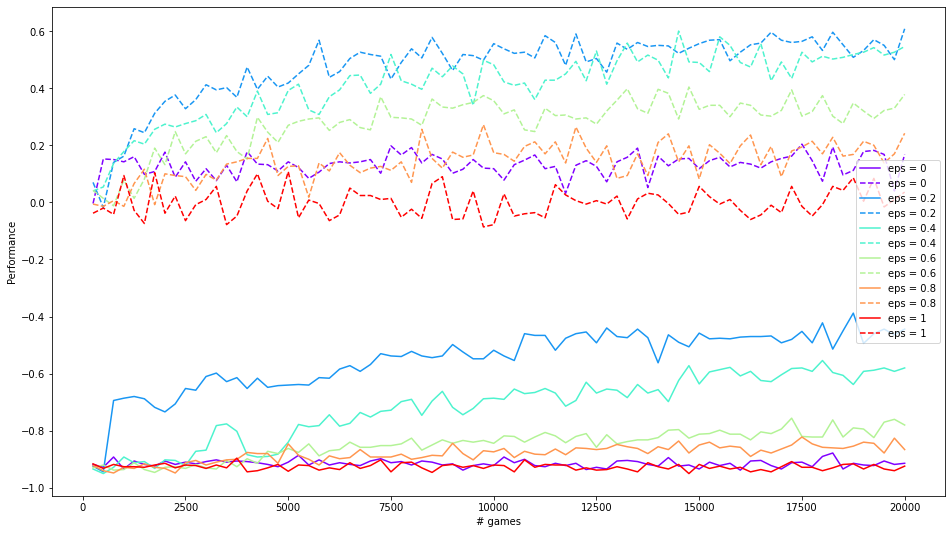

In [5]:
#Plot the results Mopt [-] and Mrand [--] for different values of eps

from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, len(epsilon_agent))))

plt.figure(figsize=(16,9))
for n in range(len(epsilon_agent)):
    c = next(color)
    plt.plot(np.linspace(250,nb_games,int(nb_games/250)), Mopt[n], '-', c=c)
    plt.plot(np.linspace(250,nb_games,int(nb_games/250)), Mrand[n], '--', c=c)
plt.legend(['eps = 0', 'eps = 0', 'eps = 0.2', 'eps = 0.2', 'eps = 0.4', 'eps = 0.4', 'eps = 0.6', 'eps = 0.6', 'eps = 0.8', 'eps = 0.8', 'eps = 1', 'eps = 1'])
plt.xlabel("# games")
plt.ylabel("Performance")
# plt.title("Mopt [-] and Mrand [--] for different values of eps")
plt.show()

The agent learns how to play Tic Tac Toe since Mopt and Mrand increase throughout the training for all values of epsilon except for epsilon is equal to 1. Note that the best epsilon is 0.2. Also note that when epsilon is equal to zero, then the self training is not performing well: this can be seen on the graph (purple lines) where Mopt and Mrand have a lower value compared to epsilon=0.2. This can be explained by the fact that once the agent has find a path, it will only update the Q_values of this path and thus, it does not explore the environment enough.
Reducing epsilon increases the performance except for epsilon = 0. 

## Question 8

In [6]:
# Initialize n* values from 1 to 40000 with 6 elements
n_star = np.linspace(1,40000,6)

# Initialize lists for reward tracking
Mopt = np.zeros((len(epsilon_agent), int(nb_games/250)))
Mrand = np.zeros((len(epsilon_agent), int(nb_games/250)))

In [7]:
# Iterate over the number of n* values and reset the Q-values at zero
for n in range(len(n_star)):
    print("... n_star =", n_star[n])
    Q = np.zeros([state_space, action_space])
    p = 0

    for i in range(nb_games):
        env.reset()
        grid, _, __ = env.observe()
        # Define the right epsilon depending on n*
        eps_min = 0.1
        eps_max = 0.8
        eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))
        # Define the agents
        player_opt = Agent(epsilon=eps_mod, player=Turns[0])
        player_agent = Agent(epsilon=eps_mod, player=Turns[1])

        for j in range(9):
            if env.current_player == player_opt.player:

                move_opt = player_opt.act_Q_Learning(grid, Q)
                grid_prev_opt = grid.copy()
                grid, end, winner = env.step(move_opt, print_grid=False)
                nb_opt = agent.state2int(grid_prev_opt)
                a_opt = agent.action_index(move_opt)

                if env.num_step > 1:
                    if end == False:
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    elif end==True: 
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = 0
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break
                else:
                    pass

            else:
                move_agent = player_agent.act_Q_Learning(grid, Q)
                grid_prev = grid.copy()
                grid, end, winner = env.step(move_agent, print_grid=False)
                nb_agent = agent.state2int(grid_prev)
                a_agent = agent.action_index(move_agent)

                if env.num_step > 1:
                    if end == False:
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                    elif end==True: 
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = 0
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break
   
        # Perform Mopt and Mrand every 250 games and store the values in a list of lists
        if i%250 == 0:
            Nwin_opt = 0
            Nlos_opt = 0
            Nwin_rand = 0
            Nlos_rand = 0
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=0, player=Turns[0])
                eps_min = 0.1
                eps_max = 0.8

                eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))

                player_agent = Agent(epsilon=eps_mod, player=Turns[1])

                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)
                    if end:
                        if winner == player_agent.player:
                            Nwin_opt += 1
                        elif winner == player_opt.player:
                            Nlos_opt += 1
                        break
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=1, player=Turns[0])
                eps_min = 0.1
                eps_max = 0.8

                eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))

                player_agent = Agent(epsilon=eps_mod, player=Turns[1])
                
                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)
                    if end:
                        if winner == player_agent.player:
                            Nwin_rand += 1
                        elif winner == player_opt.player:
                            Nlos_rand += 1
                        break

            Mopt[n,p] = (Nwin_opt-Nlos_opt)/500
            Mrand[n,p] = (Nwin_rand-Nlos_rand)/500
            p += 1
    print("non_zero_Q =", np.count_nonzero(Q))
            

... n_star = 1.0
non_zero_Q = 3720
... n_star = 8000.8
non_zero_Q = 6387
... n_star = 16000.6
non_zero_Q = 8572
... n_star = 24000.4
non_zero_Q = 10089
... n_star = 32000.2
non_zero_Q = 10614
... n_star = 40000.0
non_zero_Q = 11728


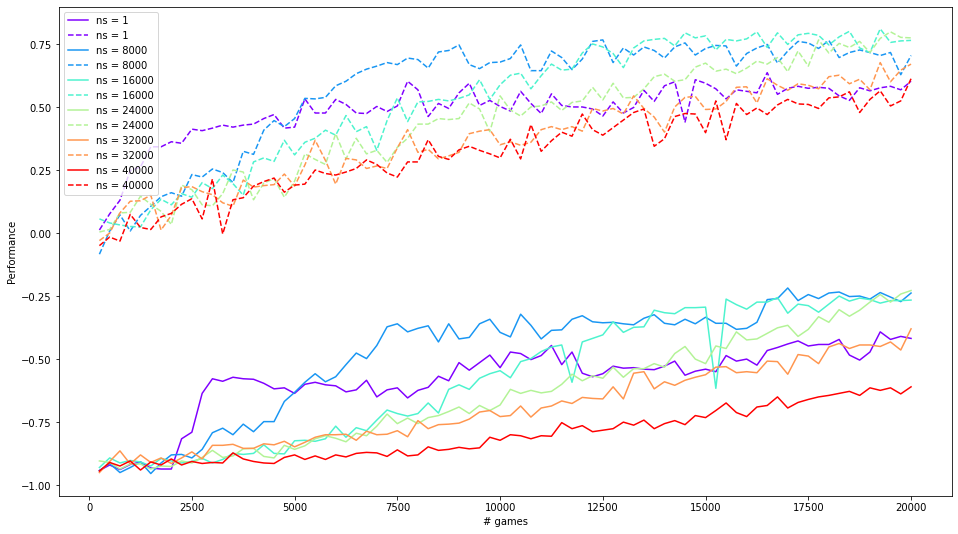

In [8]:
# Plot the results Mopt [-] and Mrand [--] for different values of n*

from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, len(n_star))))

plt.figure(figsize=(16,9))
for n in range(len(n_star)):
    c=next(color)
    plt.plot(np.linspace(250,nb_games,80), Mopt[n], '-', c=c)
    plt.plot(np.linspace(250,nb_games,80), Mrand[n], '--', c=c)

plt.legend(['ns = 1', 'ns = 1', 'ns = 8000', 'ns = 8000' , 'ns = 16000', 'ns = 16000', 'ns = 24000', 'ns = 24000', 'ns = 32000', 'ns = 32000', 'ns = 40000', 'ns = 40000'])
plt.xlabel("# games")
plt.ylabel("Performance")
# plt.title("Mopt [-] and Mrand [--] for different values of n*")
plt.show()

Compared to the previous graph, decreasing epsilon improves self-training giving higher values for both Mopt and Mrand. All configurations seem to make the agent learn.  Increasing "n*" makes the agent explore more. Decreasing "n*" makes the agent exploit more. There is however a trade-off between exploration and exploitation when computing the performance of the agent against the optimal players. The optimal "n*" equal to 16'000 gives the best Mopt (0.8) and Mrand (-0.2) results for this training.

## Question 9

In [9]:
# Compute the maximum values of Mopt and Mrand
max_Mopt = np.max(Mopt)
print("max_Mopt = ", max_Mopt)
max_Mrand = np.max(Mrand)
print('max_Mrand = ', max_Mrand)

max_Mopt =  -0.218
max_Mrand =  0.81


The highest value of M_opt is -0.19. The highest value of Mrand is 0.80.

## Question 10

In [10]:
# Import the heatmap module and generate the 3 different states manually
import seaborn as sns

In [11]:
state_s1 = np.array([[0,0,0],[0,0,0],[0,0,0]], dtype="float64")
state_s2 = np.array([[1,0,0],[1,-1,0],[-1,0,0]], dtype="float64")
state_s3 = np.array([[1,0,1],[1,-1,0],[-1,0,-1]], dtype="float64")
print(state_s1)
print(state_s2)
print(state_s3)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 1.  0.  0.]
 [ 1. -1.  0.]
 [-1.  0.  0.]]
[[ 1.  0.  1.]
 [ 1. -1.  0.]
 [-1.  0. -1.]]


In [12]:
value2player = {0: '-', 1: 'X', -1: 'O'}
for i in range(3):
    print('|', end='')
    for j in range(3):
        print(value2player[int(state_s1[i,j])], end=' ' if j<2 else '')
    print('|')
print()

|- - -|
|- - -|
|- - -|



In [13]:
value2player = {0: '-', 1: 'X', -1: 'O'}
for i in range(3):
    print('|', end='')
    for j in range(3):
        print(value2player[int(state_s2[i,j])], end=' ' if j<2 else '')
    print('|')
print()

|X - -|
|X O -|
|O - -|



In [14]:
value2player = {0: '-', 1: 'X', -1: 'O'}
for i in range(3):
    print('|', end='')
    for j in range(3):
        print(value2player[int(state_s3[i,j])], end=' ' if j<2 else '')
    print('|')
print()

|X - X|
|X O -|
|O - O|



In [24]:
# Fix the optimal n* to 16'000 and train the agent against itself

n_star_opt = 16000
Q = np.zeros([state_space, action_space])


for i in range(nb_games):
        env.reset()
        grid, _, __ = env.observe()
        
        eps_min = 0.1
        eps_max = 0.8
        eps_mod = max(eps_min, eps_max*(1-i/n_star_opt))

        player_opt = Agent(epsilon=eps_mod, player=Turns[0])
        player_agent = Agent(epsilon=eps_mod, player=Turns[1])

        for j in range(9):
            if env.current_player == player_opt.player:

                move_opt = player_opt.act_Q_Learning(grid, Q)
                grid_prev_opt = grid.copy()
                grid, end, winner = env.step(move_opt, print_grid=False)
                nb_opt = agent.state2int(grid_prev_opt)
                a_opt = agent.action_index(move_opt)

                if env.num_step > 1:
                    if end == False:
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    elif end==True: 
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = 0
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break
                else:
                    pass

            else:
                move_agent = player_agent.act_Q_Learning(grid, Q)
                grid_prev = grid.copy()
                grid, end, winner = env.step(move_agent, print_grid=False)
                nb_agent = agent.state2int(grid_prev)
                a_agent = agent.action_index(move_agent)

                if env.num_step > 1:
                    if end == False:
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                    elif end==True: 
                        rt_opt = env.reward(player = player_opt.player)
                        max_q_prime = 0
                        Q[nb_opt,a_opt] = Q[nb_opt,a_opt] + alpha*(rt_opt + gamma*max_q_prime - Q[nb_opt,a_opt])

                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break

In [25]:
# Apply a mask to filter only Qvalues of available actions
mask_1 = agent.Mask(state_s1)
state_heat_1 = agent.Q_heat(state_s1,Q)

mask_2 = agent.Mask(state_s2)
state_heat_2 = agent.Q_heat(state_s2,Q)

mask_3 = agent.Mask(state_s3)
state_heat_3 = agent.Q_heat(state_s3,Q)

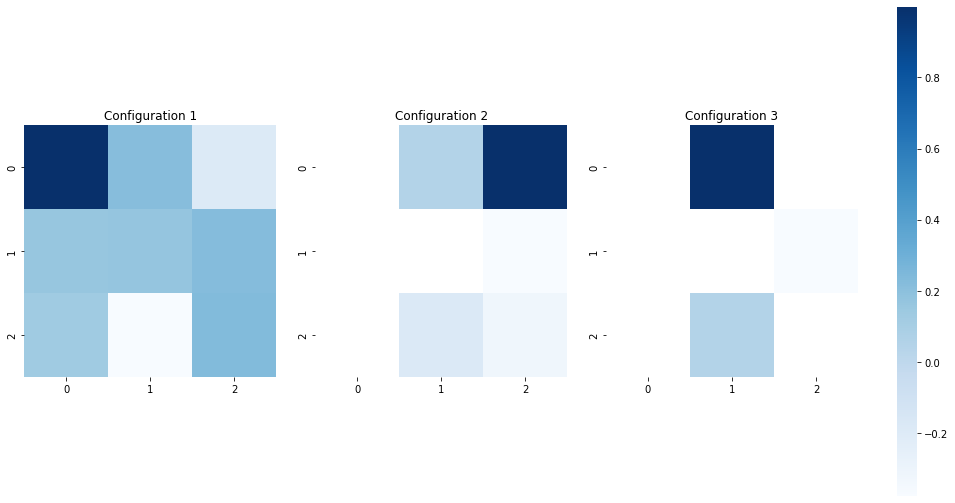

In [26]:
# Plot the results on a subplot of the heatmap for three different states
# Dark boxes show the highest Q_values

fig, (ax0, ax1, ax2, axcb) = plt.subplots(nrows=1, ncols=4, figsize=(16, 9), gridspec_kw={'width_ratios':[1,1,1,0.08]})

ax0 = sns.heatmap(state_heat_1, cmap = "Blues", mask=mask_1, square=True, cbar=False, ax=ax0)
ax0.set_title("Configuration 1")
ax0.set_xlabel("")

ax1 = sns.heatmap(state_heat_2, cmap = "Blues", mask=mask_2, square=True, cbar=False, ax=ax1)
ax1.set_title("Configuration 2")

ax2 = sns.heatmap(state_heat_3, cmap = "Blues", mask=mask_3, square=True, ax=ax2, cbar_ax=axcb)
ax2.set_title("Configuration 3")

# fig.suptitle('Heatmap for three states')
plt.show()


For the optimal "n* = 16'000", and for these three configurations, the agent learned the best action. Indeed, its starts by playing in a corner (left), defends when it needs to (middle) and wins the game on the given occasion (right). 